<a href="https://colab.research.google.com/github/zdhoney/blog/blob/master/Multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multioutput Regression in Machine Learning**


**Step 1: Reading dataset using Pandas**

In [ ]:
import pandas as pd
df = pd.read_excel('ENB2012_data.xlsx')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**Step 2: Exploratory data analysis (EDA)**

(i) Visualize the correlations between different features
Using Seaborn and Matplotlib we are visualizing the correlations,


* df.corr() method calculates the correlation between the features.
* sns.heatmap() function generates a heatmap of the correlation matrix passed to it, here we are setting cbar=False and
annot=True, to remove color bar and annotate the heatmap cells with the correlation values.

<Axes: >

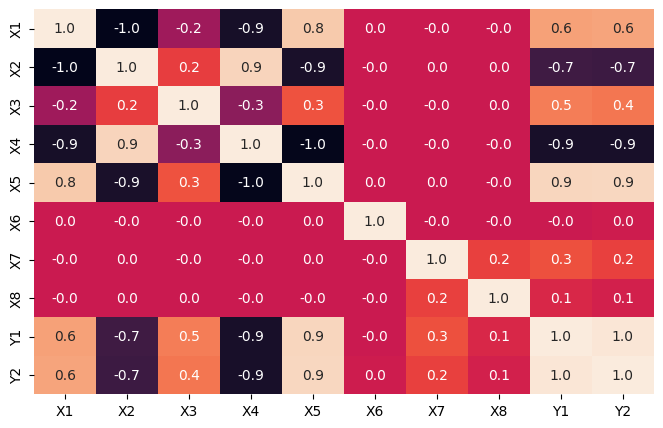

In [ ]:
# Finding correlation between features and plotting them
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), cbar = False, annot = True, fmt=".1f")


**(ii) Plotting histograms to visualize data distribution**

For each feature, a histogram is plotted with a kernel density estimation (KDE) curve, providing insights into the data distribution.

* plt.subplots(nrows, ncols): Creates a grid of subplots with the specified number of rows and columns.
* sns.histplot(): Generates a histogram plot with an optional KDE curve to visualize the distribution of data for a given feature.

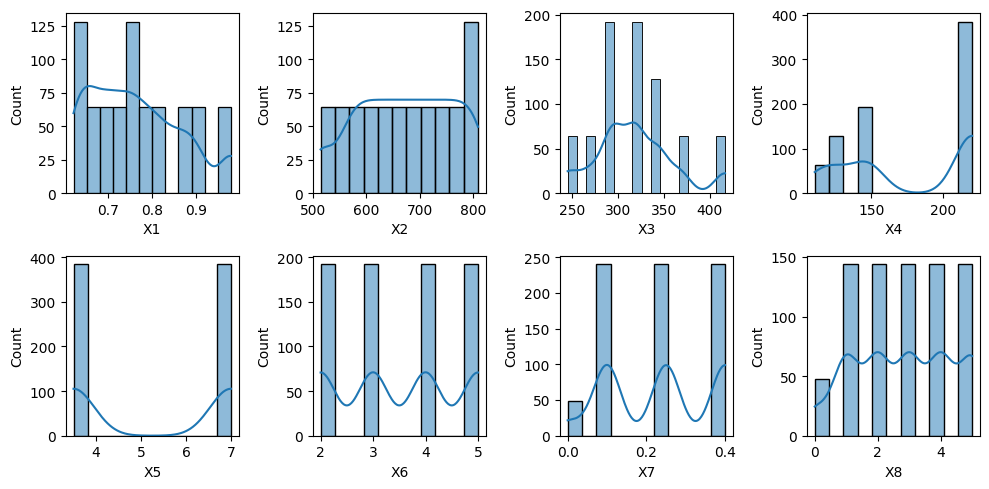

In [ ]:
import matplotlib.pyplot as plt

# Define the number of rows and columns you want
n_rows=2
n_cols=4

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:, :-2].columns):
	sns.histplot(df[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size = 0.4, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)


(460, 8) (308, 8)
(460, 2) (308, 2)


**(iv) Finding unique values in each feature to understand the variance:**

In [ ]:
for col in X_train.columns:
	print(f"{col} : ", X_train[f'{col}'].unique())


X1 :  [0.64 0.86 0.76 0.71 0.62 0.69 0.74 0.66 0.98 0.79 0.9  0.82]
X2 :  [784.  588.  661.5 710.5 808.5 735.  686.  759.5 514.5 637.  563.5 612.5]
X3 :  [343.  294.  416.5 269.5 367.5 245.  318.5]
X4 :  [220.5  147.   122.5  110.25]
X5 :  [3.5 7. ]
X6 :  [4 3 5 2]
X7 :  [0.25 0.   0.1  0.4 ]
X8 :  [3 0 5 4 1 2]


**(v) Regression plot of each feature wrt. Y1**

Here we are exploring the relationships between each feature in the dataframe and the ‘Y1’ output variable.

* sns.regplot() is used here to create scatter plots with regression lines for each feature against ‘Y1’. The scatter points are marked in green, and the regression lines are depicted in red.
* scatter_kws and line_kws: These parameters allow customization of the appearance of the scatter points and the regression line in the plot.

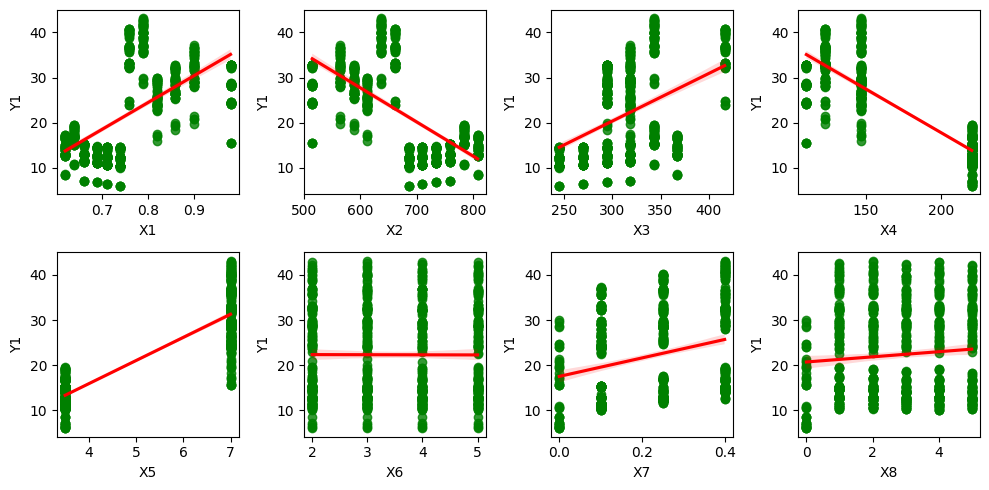

In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
	sns.regplot(x = df[column], y = df['Y1'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()


**(vi) Regression plot of each feature wrt. Y2**

The code remains unchanged, we have only substituted the y-axis variable, with ‘Y2’ in place of ‘Y1.’

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:411: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, **kws)


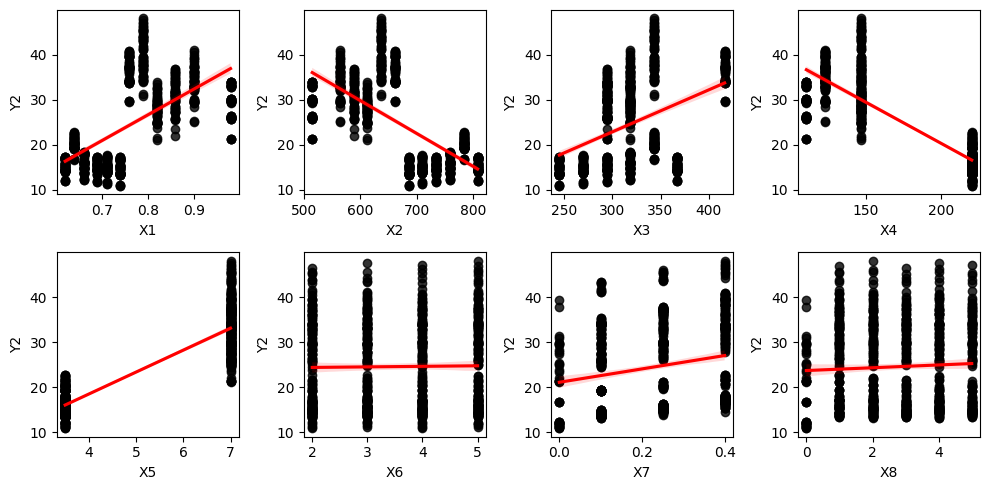

In [ ]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
	sns.regplot(x = df[column], y = df['Y2'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()


**Step 3: Utility function to print result metrics**

Here I’m creating a utility functions showResults() and printPredictions() to print the output regression metrics and predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def printPredictions(y_true,y_pred, count):
    print(f"Predictions: ")
    print(y_true.assign(
        Y1_pred = y_pred[:,0],
        Y2_pred = y_pred[:,1]
    ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
    print("R2 score: ",r2_score(y_true,y_pred))
    print("Mean squared error: ",mean_squared_error(y_true,y_pred))
    print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
    printPredictions(y_true,y_pred, count)


**Step 4: Splitting data into train and test data**

This code uses scikit-learn’s train_test_split function to split a dataset into training and testing sets.

The data is divided such that 80% is used for training, and 20% is reserved for testing. The random_state parameter ensures reproducibility.

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size = 0.4, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(460, 8) (308, 8)
(460, 2) (308, 2)


In [ ]:
for col in X_train.columns:
	print(f"{col} : ", X_train[f'{col}'].unique())


X1 :  [0.82 0.64 0.86 0.9  0.66 0.79 0.62 0.76 0.69 0.74 0.98 0.71]
X2 :  [612.5 784.  588.  563.5 759.5 637.  808.5 661.5 735.  686.  514.5 710.5]
X3 :  [318.5 343.  294.  367.5 416.5 245.  269.5]
X4 :  [147.   220.5  122.5  110.25]
X5 :  [7.  3.5]
X6 :  [2 4 5 3]
X7 :  [0.1  0.4  0.25 0.  ]
X8 :  [1 2 4 3 5 0]


**Step 5: Creating multi-output regression model**

The multi-output regression using Scikit-learn can be done in three ways:

**1. Models which support Multi-output regression**


---


Several models are capable of performing multi-output regression:

* Linear Regression


* Random Forest Regressor

* Extra Trees Regressor

* K-Neighbors Regressor

**(i) Linear regression**

The simplest of all regressions which assumes a linear relationship between input features and target variables.





In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))


R2 score:  0.9028145634342284
Mean squared error:  9.51221811381318
Mean absolute error:  2.187258158162318
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   18.8418 |   19.7585 |
| 13.17 | 16.39 |   14.0391 |   16.7736 |
| 32.82 | 32.78 |   31.3253 |   32.0241 |
| 41.32 | 46.23 |   35.9226 |   36.7056 |
| 16.69 | 19.76 |   15.3271 |   17.2817 |


**(ii) Random forest regressor**

An ensemble learning technique that combines multiple decision trees to provide an accurate predictions for regression tasks.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
showResults(y_test,rdf.predict(X_test))


R2 score:  0.9778804366595015
Mean squared error:  2.0639294852597407
Mean absolute error:  0.7740603896103906
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.5563 |   17.1402 |
| 13.17 | 16.39 |   13.1256 |   16.136  |
| 32.82 | 32.78 |   32.6299 |   33.327  |
| 41.32 | 46.23 |   42.0042 |   42.3277 |
| 16.69 | 19.76 |   16.8656 |   19.8435 |


**(iii) Extra trees regressor**

Random forest sub-samples the input data with replacement, whereas Extra Trees use the whole original sample and also adds randomness in the tree-building process by choosing random split instead of an optimum one.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))


R2 score:  0.9820459618433903
Mean squared error:  1.6756123597402617
Mean absolute error:  0.6790857142857142
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.3924 |   17.1856 |
| 13.17 | 16.39 |   13.141  |   16.156  |
| 32.82 | 32.78 |   32.8359 |   32.9547 |
| 41.32 | 46.23 |   41.8964 |   43.1958 |
| 16.69 | 19.76 |   16.7788 |   20.0136 |


**(iv) K-neighbours regressor**

This model estimates target values based on the proximity of neighbors, making it adaptable and effective for multi-output regression, especially when local patterns matter among the features.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
showResults(y_test,knn.predict(X_test))


R2 score:  0.9552345708141144
Mean squared error:  4.417399493506494
Mean absolute error:  1.5228636363636365
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |    14.408 |    15.384 |
| 13.17 | 16.39 |    13.65  |    16.602 |
| 32.82 | 32.78 |    30.262 |    30.852 |
| 41.32 | 46.23 |    40.496 |    44.61  |
| 16.69 | 19.76 |    16.946 |    20.164 |


**2. Using MultiOutputRegressor()**


Here we train a separate regressor for each target variable. It’s a straightforward method to expand the capabilities of regressors that aren’t inherently designed for multi-target regression tasks.



In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

svm_multi = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
showResults(y_test,svm_multi.predict(X_test))


R2 score:  0.9876712414729131
Mean squared error:  1.1737865734622686
Mean absolute error:  0.64545622613329
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.4987 |   16.426  |
| 13.17 | 16.39 |   12.9448 |   16.4907 |
| 32.82 | 32.78 |   32.2836 |   32.5228 |
| 41.32 | 46.23 |   41.6524 |   44.4467 |
| 16.69 | 19.76 |   17.0211 |   20.1875 |


**3. Chained Multi-output Regression : Regression Chain**


In this approach we are are organizing individual regression models into a sequence or “chain.”

Each model in the chain predicts a target label based on all available input features and the predictions of previous models in the sequence. This chaining strategy leverages both feature information and the insights gained from earlier model predictions to make accurate multi-output predictions.

In [ ]:
from sklearn.multioutput import RegressorChain

# Defining the chained multioutput model
svm_chain = RegressorChain(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))

svm_chain.fit(X_train,y_train)
showResults(y_test,svm_chain.predict(X_test))


R2 score:  0.9770183076559664
Mean squared error:  2.160857985360773
Mean absolute error:  0.8648991134909931
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.4987 |   17.0196 |
| 13.17 | 16.39 |   12.9448 |   16.1628 |
| 32.82 | 32.78 |   32.2836 |   33.2849 |
| 41.32 | 46.23 |   41.6524 |   43.2883 |
| 16.69 | 19.76 |   17.0211 |   19.9793 |
